In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('data/weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Data Preprocessing

### Handling Categorical Columns

In [4]:
category_obj = (df.dtypes == "object")
category_cols = list(category_obj[category_obj].index)
print(f"Categorical Columns: {category_cols}")

Categorical Columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [5]:
for col in category_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

### Handling Numerical Columns

In [6]:
num_types = (df.dtypes == "float64")
num_cols = list(num_types[num_types].index)
print(f"Numerical Columns:\n{num_cols}")

Numerical Columns:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [7]:
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [8]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [9]:
aus_df = df.copy(deep=True)

In [10]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df['Location'] = pd.Categorical(df['Location'])
df['WindGustDir'] = pd.Categorical(df['WindGustDir'])
df['WindDir9am'] = pd.Categorical(df['WindDir9am'])
df['RainToday'] = pd.Categorical(df['RainToday'])
df['RainTomorrow'] = pd.Categorical(df['RainTomorrow'])
df['RainToday'] = pd.Categorical(df['RainToday'])

In [13]:
labelencoder = LabelEncoder()
df['Location_cat'] = labelencoder.fit_transform(df['Location'])

In [14]:
labelencoder = LabelEncoder()
df['WindGustDir_cat'] = labelencoder.fit_transform(df['WindGustDir'])

In [15]:
labelencoder = LabelEncoder()
df['WindDir9am_cat'] = labelencoder.fit_transform(df['WindDir9am'])

In [16]:
labelencoder = LabelEncoder()
df['RainToday_cat'] = labelencoder.fit_transform(df['RainToday'])

In [17]:
labelencoder = LabelEncoder()
df['RainTomorrow_cat'] = labelencoder.fit_transform(df['RainTomorrow'])

In [18]:
labelencoder = LabelEncoder()
df['RainToday_cat'] = labelencoder.fit_transform(df['RainToday'])

In [19]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Location_cat,WindGustDir_cat,WindDir9am_cat,RainToday_cat,RainTomorrow_cat
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,4.50993,16.9,21.8,No,No,2,13,13,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,4.50993,17.2,24.3,No,No,2,14,6,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,2.00000,21.0,23.2,No,No,2,15,13,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,4.50993,18.1,26.5,No,No,2,4,9,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,8.00000,17.8,29.7,No,No,2,13,1,0,0


In [20]:
aus_cities = pd.read_csv("data/aus.csv")

In [21]:
aus_cities.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Sydney,-33.8650,151.2094,Australia,AU,New South Wales,admin,5312163,4840600
1,Melbourne,-37.8136,144.9631,Australia,AU,Victoria,admin,5078193,4529500
2,Brisbane,-27.4678,153.0281,Australia,AU,Queensland,admin,2514184,2360241
3,Perth,-31.9522,115.8589,Australia,AU,Western Australia,admin,2059484,2039200
4,Adelaide,-34.9289,138.6011,Australia,AU,South Australia,admin,1345777,1295714


In [22]:
def get_cities_not_found_list():
    aus_cities_list = list(set(aus_cities.city))
    datset_cities_list = list(set(aus_df.Location.unique()))
    cities_not_found = []
    for city in datset_cities_list:
        found_city = False
        for aus_city in aus_cities_list:
            if city.lower() in aus_city.lower():
                # print(f"Dataset City: {city}")
                # print(f"AusData city: {aus_city}\n")
                found_city = True
        if not found_city:
            cities_not_found.append(city)
    return cities_not_found

In [23]:
aus_df.loc[aus_df.Location == "MelbourneAirport", 'Location'] = "Melbourne"
aus_df.loc[aus_df.Location == "PerthAirport", 'Location'] = "Perth"
aus_df.loc[aus_df.Location == "SydneyAirport", 'Location'] = "Sydney"
aus_df.loc[aus_df.Location == "CoffsHarbour", 'Location'] = "Coffs Harbour"
aus_df.loc[aus_df.Location == "GoldCoast", 'Location'] = "Gold Coast"
aus_df.loc[aus_df.Location == "NorfolkIsland", 'Location'] = "New Norfolk"
aus_df.loc[aus_df.Location == "BadgerysCreek", 'Location'] = "Badger Creek"
aus_df.loc[aus_df.Location == "WaggaWagga", 'Location'] = "Wagga Wagga"
aus_df.loc[aus_df.Location == "AliceSprings", 'Location'] = "Alice Springs"
aus_df.loc[aus_df.Location == "MountGambier", 'Location'] = "Mount Gambier"

In [24]:
cities_not_found = get_cities_not_found_list()
print(cities_not_found)

['SalmonGums', 'Tuggeranong', 'Witchcliffe', 'Dartmoor', 'Uluru', 'Woomera', 'MountGinini', 'Williamtown', 'Walpole', 'Watsonia', 'NorahHead', 'PearceRAAF']


In [25]:
# NotFound: Dartmoor Tuggeranong NorahHead Woomera Witchcliffe Walpole MountGinini Uluru Watsonia PearceRAAF Williamtown

In [26]:
map_df = aus_df.merge(aus_cities, how='inner',
                      left_on='Location', right_on='city')

In [27]:
date_df = map_df.loc[map_df.Date == "2008-12-01"]

In [28]:
date_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainTomorrow,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,2008-12-01,Albury,13.400000,22.900000,0.600000,5.468232,7.611178,W,44.00000,W,...,No,Albury,-36.0806,146.9158,Australia,AU,New South Wales,NaN,47974,4804
15076,2008-12-01,Newcastle,13.200000,23.221348,0.000000,5.468232,7.611178,W,40.03523,NW,...,No,Newcastle,-32.9167,151.7500,Australia,AU,New South Wales,NaN,322278,152984
21124,2008-12-01,Penrith,15.200000,32.600000,0.000000,5.468232,7.611178,WNW,59.00000,NNE,...,No,Penrith,-33.7511,150.6942,Australia,AU,New South Wales,NaN,13295,13295
30485,2008-12-01,Sydney,17.600000,31.300000,0.000000,7.600000,10.900000,W,40.03523,ENE,...,No,Sydney,-33.8650,151.2094,Australia,AU,New South Wales,admin,5312163,4840600
39543,2008-12-01,Wollongong,12.194034,23.221348,2.360918,5.468232,7.611178,W,40.03523,N,...,No,Wollongong,-34.4331,150.8831,Australia,AU,New South Wales,NaN,302739,289236


## Classification Models

In [29]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Location_cat',
       'WindGustDir_cat', 'WindDir9am_cat', 'RainToday_cat',
       'RainTomorrow_cat'],
      dtype='object')

In [30]:
main_df = df[['Location_cat', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
                 'Sunshine', 'WindGustDir_cat', 'WindGustSpeed', 'Humidity9am',
                 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                 'Temp9am', 'Temp3pm', 'RainToday_cat']]

In [31]:
main_df["RainTomorrow_cat"] = df[['RainTomorrow_cat']]

<ipython-input-31-f0aa18e7a11f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df["RainTomorrow_cat"] = df[['RainTomorrow_cat']]


In [32]:
main_df.head()

,Location_cat,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir_cat,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_cat,RainTomorrow_cat
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [33]:
main_df.count()

Location_cat        145460
MinTemp             145460
MaxTemp             145460
Rainfall            145460
Evaporation         145460
Sunshine            145460
WindGustDir_cat     145460
WindGustSpeed       145460
Humidity9am         145460
Humidity3pm         145460
Pressure9am         145460
Pressure3pm         145460
Cloud9am            145460
Cloud3pm            145460
Temp9am             145460
Temp3pm             145460
RainToday_cat       145460
RainTomorrow_cat    145460
dtype: int64

In [34]:
pct_index = int(0.7 * len(main_df))

In [35]:
pct_index

101822

In [36]:
train_df, test_df = main_df[:pct_index], main_df[pct_index:]

In [37]:
train_df

,Location_cat,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir_cat,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_cat,RainTomorrow_cat
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101817,22,3.7,11.7,0.0,1.200000,9.200000,5,48.0,76.0,60.0,1027.4,1023.4,3.000000,4.00000,6.5,11.2,0,0
101818,22,6.4,12.1,0.0,1.800000,0.000000,5,59.0,74.0,76.0,1017.6,1015.1,8.000000,8.00000,8.1,10.2,0,1
101819,22,7.5,16.0,4.8,1.400000,5.000000,5,50.0,78.0,72.0,1013.6,1011.8,1.000000,7.00000,10.3,13.8,1,1
101820,22,8.1,12.8,1.4,1.400000,3.000000,12,41.0,97.0,87.0,1020.7,1023.5,6.000000,7.00000,10.5,10.6,1,0


In [38]:
test_df

,Location_cat,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir_cat,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_cat,RainTomorrow_cat
101822,22,8.0,14.000000,0.2,0.800000,2.900000,6,41.00000,92.0,85.0,1032.6,1030.9,7.000000,7.00000,9.5,11.4,0,0
101823,22,9.0,12.700000,0.0,1.000000,1.800000,3,37.00000,86.0,82.0,1032.6,1031.1,7.000000,5.00000,10.5,12.3,0,0
101824,22,5.4,14.200000,0.2,1.000000,5.200000,12,22.00000,100.0,74.0,1034.6,1033.2,1.000000,7.00000,8.3,13.1,0,0
101825,22,7.6,13.000000,0.0,1.000000,0.200000,6,19.00000,78.0,71.0,1033.5,1031.0,7.000000,7.00000,10.3,11.9,0,0
101826,22,7.4,14.200000,0.0,1.000000,5.700000,3,26.00000,83.0,59.0,1029.9,1028.1,7.000000,6.00000,8.3,13.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.400000,0.0,5.468232,7.611178,0,31.00000,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0
145456,41,3.6,25.300000,0.0,5.468232,7.611178,6,22.00000,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0
145457,41,5.4,26.900000,0.0,5.468232,7.611178,3,37.00000,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0
145458,41,7.8,27.000000,0.0,5.468232,7.611178,9,28.00000,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0


## Pycaret Models

In [39]:
from pycaret.classification import *

In [40]:
clf1 = setup(train_df, target="RainTomorrow_cat", log_experiment=True)

,Description,Value
0,session_id,7176
1,Target,RainTomorrow_cat
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(101822, 18)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [41]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8484,0.8736,0.5112,0.7405,0.6048,0.5149,0.5285,0.6080
rf,Random Forest Classifier,0.8480,0.8709,0.4928,0.7516,0.5952,0.5066,0.5237,3.3580
et,Extra Trees Classifier,0.8467,0.8717,0.4801,0.7549,0.5868,0.4984,0.5176,3.1360
gbc,Gradient Boosting Classifier,0.8425,0.8591,0.4805,0.7333,0.5806,0.4887,0.5053,5.5320
ada,Ada Boost Classifier,0.8365,0.8484,0.4726,0.7098,0.5673,0.4715,0.4864,1.9380
lda,Linear Discriminant Analysis,0.8349,0.8486,0.4850,0.6953,0.5714,0.4731,0.4849,0.5490
lr,Logistic Regression,0.8336,0.8453,0.4624,0.7026,0.5576,0.4605,0.4758,2.7460
ridge,Ridge Classifier,0.8333,0.0000,0.4136,0.7360,0.5295,0.4377,0.4646,0.0330
knn,K Neighbors Classifier,0.8288,0.8075,0.4830,0.6701,0.5613,0.4584,0.4679,5.5420
qda,Quadratic Discriminant Analysis,0.8214,0.8274,0.4942,0.6369,0.5565,0.4469,0.4525,0.0750


### Tuning Hyperparameters for Random Forest Classifer

In [42]:
rf_model = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8474,0.8687,0.4981,0.7448,0.5970,0.5074,0.5230
1,0.8467,0.8687,0.4821,0.7535,0.5880,0.4993,0.5181
2,0.8451,0.8699,0.4881,0.7405,0.5884,0.4979,0.5143
3,0.8456,0.8673,0.4974,0.7363,0.5937,0.5028,0.5175
4,0.8515,0.8728,0.4881,0.7735,0.5985,0.5131,0.5336
Mean,0.8473,0.8695,0.4908,0.7497,0.5931,0.5041,0.5213
SD,0.0023,0.0018,0.0061,0.0132,0.0043,0.0056,0.0067


In [43]:
# tuned_lr = tune_model(rf_model)

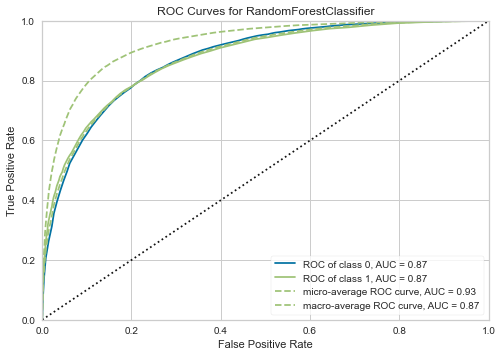

In [44]:
plot_model(rf_model)

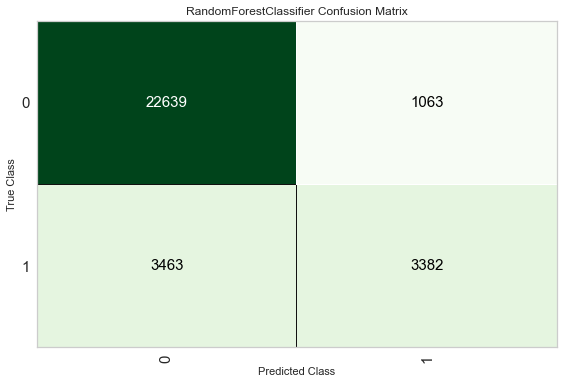

In [45]:
plot_model(rf_model, plot='confusion_matrix')

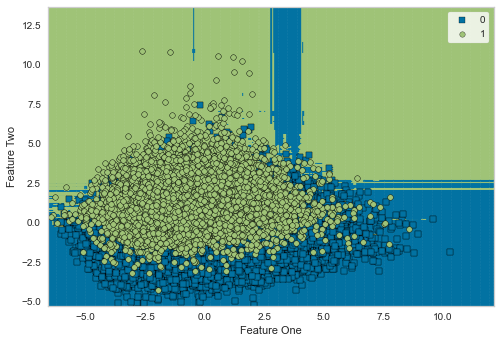

In [46]:
plot_model(rf_model, plot='boundary')

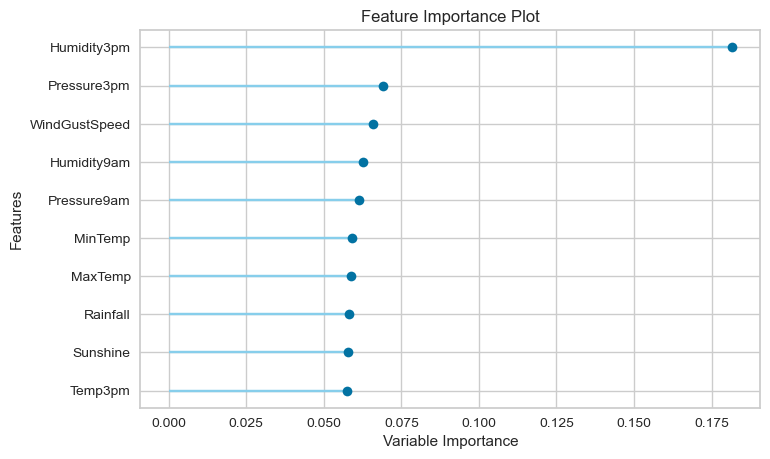

In [47]:
plot_model(rf_model, plot='feature')

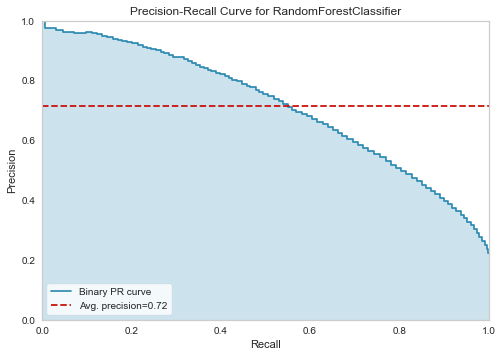

In [48]:
plot_model(rf_model, plot='pr')

## Predict Model

In [49]:
pred = predict_model(rf_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8518,0.8749,0.4941,0.7609,0.5991,0.5132,0.5312


## Save Model

In [50]:
save_model(rf_model, model_name='rf_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='RainTomorrow_cat',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 num...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
       